In [2]:
import os
import glob
import numpy as np
import scipy.stats as stats
from imageio import imread
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
def corr(pred_fs, tgt_fs):
    corrs = []
    for pred_f, tgt_f in zip(pred_fs, tgt_fs):
        pred_np = imread(pred_f).reshape(-1)
        tgt_np = imread(tgt_f).reshape(-1)
        corrs.append(np.corrcoef(pred_np, tgt_np)[0, 1])
        #corrs.append(stats.spearmanr(pred_np, tgt_np))
    return np.asarray(corrs)

roots = [
    "../results/ensemble_Enza-OOD-f2_VDense", 
    "../results/ensemble_local_Enza-OOD-f2_VDense",
    "../results/sgld_Enza-OOD-f2_VDense",
    "../results/svi_Enza-OOD-f2_VDense",
    "../results/mcdropout_Enza-OOD-f2_VDense",
    "../results/batchensemble_Enza-OOD-f2_VDense",
    "../results/snapshot_Enza-OOD-f2_VDense",
]
labels = [
    "Ensemble",
    "Ours",
    "SGLD",
    "SVI",
    "MC-Dropout",
    "BatchEnsemble",
    "Snapshot",
]
splits = ["VSparse", "Sparse", "Dense", "VDense"]
outputs = defaultdict(list)
for split in splits:
    print(split)
    for label, root in zip(labels, roots):
        pred_fs = sorted(glob.glob(os.path.join(root, split) + "/pred*"))
        tgt_fs = sorted(glob.glob(os.path.join(root, split) + "/tgt*"))
        pcorr = corr(pred_fs, tgt_fs)
        outputs[label].append((split, pcorr))
        print(label, np.mean(pcorr))

VSparse
Ensemble 0.9710888499826125
Ours 0.9717265901047335
SGLD 0.9248029263623945
SVI 0.8456991022774927
MC-Dropout 0.8147732695941494
BatchEnsemble 0.9690179793915639
Snapshot 0.9699715726264266
Sparse
Ensemble 0.9671969916016541
Ours 0.9660426400840529
SGLD 0.9022386504108897
SVI 0.8177149628762168
MC-Dropout 0.8432693595390477
BatchEnsemble 0.9653971993259314
Snapshot 0.9620145721633021
Dense
Ensemble 0.9631972873226149
Ours 0.961655809707402
SGLD 0.8870675288365439
SVI 0.7776660823239242
MC-Dropout 0.8629711164113875
BatchEnsemble 0.9614553963891421
Snapshot 0.9570468180988552
VDense
Ensemble 0.9558584926029593
Ours 0.9521263338005563
SGLD 0.8612393577152485
SVI 0.7338825633342654
MC-Dropout 0.8650602994132817
BatchEnsemble 0.9535284334564981
Snapshot 0.9454672784876165


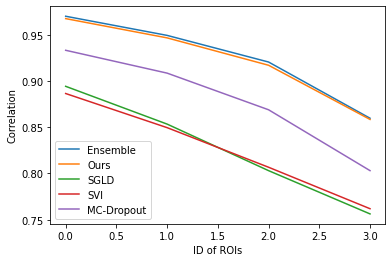

In [12]:
import matplotlib.pyplot as plt

for label, output in outputs.items():
    #if label == "SVI":
    #    continue
    plt.plot(range(len(splits)), output, label=label)
plt.xlabel("ID of ROIs")
plt.ylabel("Correlation")
plt.legend()
plt.show()

In [4]:
roots = [
    #"../results/ensemble_Enza-OOD-f2_VDense", 
    #"../results/ensemble_local_Enza-OOD-f2_VDense",
    "../results/sgld_Enza-OOD-f2_VDense",
    #"../results/svi_Enza-OOD-f2_VDense",
    #"../results/mcdropout_Enza-OOD-f2_VDense",
]
labels = [
    #"Ensemble",
    #"Ours",
    "SGLD",
    #"SVI",
    #"MC-Dropout",
]
splits = ["VSparse", "Sparse", "Dense", "VDense"]
outputs = defaultdict(list)
for split in splits:
    print(split)
    for label, root in zip(labels, roots):
        print(label)
        pred_fs = sorted(glob.glob(os.path.join(root, split) + "/pred*"))
        tgt_fs = sorted(glob.glob(os.path.join(root, split) + "/tgt*"))
        outputs[label].append(corr(pred_fs, tgt_fs))
        print(outputs)

VSparse
SGLD
defaultdict(<class 'list'>, {'SGLD': [0.9248029263623945]})
Sparse
SGLD


KeyboardInterrupt: 

In [11]:
import pickle as pkl
with open("distribution_shift_dense.pkl", "wb") as writer:
    pkl.dump(outputs, writer)

In [6]:
outputs['Snapshot']

[('VSparse',
  array([0.947926  , 0.95734256, 0.9642012 , 0.96265041, 0.96019741,
         0.93587796, 0.96801166, 0.95516506, 0.97838388, 0.97982606,
         0.98644858, 0.98277315, 0.98001165, 0.98551008, 0.98289914,
         0.98705051, 0.97568781, 0.97885636, 0.97190776, 0.97164422,
         0.98074733, 0.93816726, 0.95775581, 0.92670671, 0.96884331,
         0.97894175, 0.98365288, 0.98321711, 0.97767968, 0.97622822,
         0.97634622, 0.9526655 , 0.96263599, 0.9697749 , 0.96244645,
         0.98730986, 0.97397113, 0.9699413 , 0.9724154 , 0.97878771,
         0.97822853])),
 ('Sparse',
  array([0.86664811, 0.90284712, 0.90354473, 0.93953819, 0.94172817,
         0.93696058, 0.95165523, 0.92557962, 0.94158862, 0.94234035,
         0.95275332, 0.90014023, 0.94161077, 0.94075027, 0.96357055,
         0.94861383, 0.96313423, 0.947926  , 0.93564554, 0.9721351 ,
         0.97592667, 0.97051654, 0.92633536, 0.9618279 , 0.95789598,
         0.95588037, 0.97218404, 0.97686255, 0.954423 